### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

#### Independent variable ####
Color: Test question (word condition)

#### Dependent variable ####
Time: congruent and incongruent times (The time that needed by particpant to name the ink colors)



(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

#### Null hypotheses #####
congruent words performance is better than incongruent words performance 
$$H_0: \mu_{cp} > \mu_{ip} $$



#### Alternative hypotheses ####
incongruent words performance is better than congruent words performance 
$$H_1: \mu_{cp} < \mu_{ip} $$

**where:**
$$\mu_{cp}$$ congruent words performance
$$\mu_{ip}$$ incongruent words performance


***Since the sample size is less than 30, we will use dependent t-test as our statistical test method to find out the p-value and determine if we should reject, fail the null***

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [37]:
# Perform the analysis here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

df = pd.read_csv('stroopdata.csv')

df.head(4)


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687


In [38]:
# Make sure that there is no null value in data frame
print ('Is there any null value in the data frame?', df.isnull().values.any())


Is there any null value in the data frame? False


***measure of central tendency***

In [39]:
# Mean of congruent and incongruent
congruent_mean = df['Congruent'].mean()
incongruent_mean = df['Incongruent'].mean()

print ('congruent_mean = ', congruent_mean)
print ('incongruent_mean = ', incongruent_mean)

congruent_mean =  14.051125
incongruent_mean =  22.0159166667


In [40]:
# Median of congruent and incongruent
congruent_median = df['Congruent'].median()
incongruent_median = df['Incongruent'].median()

print ('congruent_median = ', congruent_median)
print ('incongruent_median = ', incongruent_median)

congruent_median =  14.3565
incongruent_median =  21.0175


***measure of variability***

In [41]:
# Computing IQR for congruent
Q1 = df['Congruent'].quantile(0.25)
Q3 = df['Congruent'].quantile(0.75)
congruent_IQR = Q3 - Q1

# Computing IQR for incongruent
Q1 = df['Incongruent'].quantile(0.25)
Q3 = df['Incongruent'].quantile(0.75)
incongruent_IQR = Q3 - Q1

print ('congruent_IQR : ',congruent_IQR )
print ('incongruent_IQR : ',incongruent_IQR )



congruent_IQR :  4.3054999999999986
incongruent_IQR :  5.33475


In [42]:
# Computing standard deviation for congruent and incongruent
print ('Standard deviation for congruent and incongruent  : ' )
df.std()


Standard deviation for congruent and incongruent  : 


Congruent      3.559358
Incongruent    4.797057
dtype: float64

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

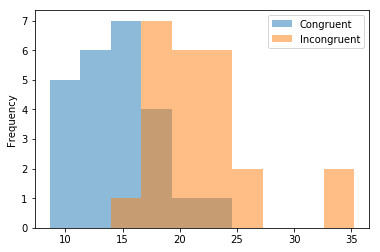

In [43]:
# Build the visualizations here
df4 = pd.DataFrame({'Congruent': df['Congruent'] , 'Incongruent': df['Incongruent']}, columns=['Congruent', 'Incongruent'])

plt.figure();
df4.plot.hist(alpha=0.5)

***Observation***

***In the histogram , Congruent time value peaks at between 14 seconds and 15 seconds. This is the bin where most of our Congruent time values fall. There is a wide spread in the histogram, with our observations ranging from 5 seconds to 24 seconds. This finding means there is more variation in our congruent data.***

***One more observation about the incongruent performance, we can see clearly that we have outliers for the values from 32.5 seconds to 35 seconds. We should remove it to have accurate histogram plot***



(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

***Since the sample size is less than 30, we will use dependent t-test as our statistical test method to find out the p-value and determine if we should reject, failt the null***

In [44]:
# Perform the statistical test here
# Calculates the T-test on TWO RELATED samples of scores, Congruent and Incongruent.
stats.ttest_rel(df['Congruent'], df['Incongruent'])


Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

***Since the p value is under 0.05 therefore, we reject our null hypothesis. Thus, we can conclude that incongruent and congruent group has different average population time to complete tasks.***

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--